# Install and Set Up Kaggle and API Key

Follow these steps to install and configure the Kaggle API on your system:

1. **Create a Kaggle Account**
   - Visit [Kaggle](https://www.kaggle.com) and sign up for an account.

2. **Obtain Kaggle API Key**
   - Go to your Kaggle account settings.
   - Find the "API" section and click on "Create New API Token".
   - This will download a `kaggle.json` file containing your API key.

3. **Install Kaggle Package**
   - Use Conda to install the Kaggle package by running:
     ```bash
     conda install kaggle
     ```

4. **Configure API Key**
   - Copy the `kaggle.json` file to your user directory under the `.kaggle` folder. On most systems, you can use the following command:
     ```bash
     mkdir -p ~/.kaggle
     cp path_to_downloaded_kaggle.json ~/.kaggle/kaggle.json
     chmod 600 ~/.kaggle/kaggle.json
     ```
   - Ensure the `.kaggle` directory and the `kaggle.json` file have the proper permissions by setting:
     ```bash
     chmod 600 ~/.kaggle/kaggle.json
     ```


In [1]:
import pandas as pd
import kaggle
# Pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scoring 
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
# models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



In [2]:
# Get the data using an API call
kaggle.api.dataset_download_files('rodsaldanha/arketing-campaign', path='resources', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign


In [3]:
# Import the data
data = pd.read_csv("./resources/marketing_campaign.csv",delimiter=';')


# EDA (Exploratory Data Analysis)
We will revisit this. For now We want the rough draft of the model
#
During EDA

Visualize the data using plots and graphs to understand distributions and relationships between variables.
Calculate summary statistics to get a sense of the central tendencies and variability.
Identify any correlations between variables that might influence model choices.
Detect and treat missing values or outliers that could skew the results of your analysis.
Explore the data's structure to inform feature selection and engineering, which are key to building effective machine learning models.

# read any and all documentation you can find on your dataset to understand it better


In [4]:
display (data.head())
# what does our data look like? At this point also use any documentation on the data set to find out what each value means and how it might be used is solving the business problem
display (data.shape)
print (f'Columns with NA valuses \n {data.isna().sum()[lambda x: x > 0]}')
# Make desision about null values. Can we fill them of should we drop rows with null values?
non_numeric= (data.dtypes[(data.dtypes != 'int64') & (data.dtypes != 'float64')]).index.tolist()
# display (data.dtypes)
print (f'Columns that are not numeric :\n {non_numeric}')
# Explore non numberic type to see how we can use them in the model

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


(2240, 29)

Columns with NA valuses 
 Income    24
dtype: int64
Columns that are not numeric :
 ['Education', 'Marital_Status', 'Dt_Customer']


In [5]:
# just to get started we will drop NA and columns that are not numberic. this will let us get a rough model
# we come back to this and preprocess based on the draft results if needed


data_drop_columns = data.drop(columns=non_numeric, axis=1)
data_drop_na = data_drop_columns.dropna()
df = data_drop_na.copy()
df.head()



,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# Split data into Train and Test **80/20 split**
# add verbage as to why we picked response

X = df.drop('Response', axis=1)
y = df["Response"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# This will split 'X' and 'y' such that 80% is used for training and 20% is used for testing.

# Scaling the data 
We will want to compare the scores of standard scalar to Min Max scalar to pick the bast scaling methood.

In [7]:
# Scale the X data by using StandardScaler()
scaler_ss = StandardScaler().fit(X_train)
X_train_ss_scaled = scaler_ss.transform(X_train)
X_train_ss_scaled

# Transform the test dataset based on the fit from the training dataset
X_test_ss_scaled = scaler_ss.transform(X_test)
X_test_ss_scaled

array([[-0.61569326, -0.54159707,  0.01098642, ..., -0.09842058,
         0.        ,  0.        ],
       [-0.58762552,  1.43447022, -0.69592674, ..., -0.09842058,
         0.        ,  0.        ],
       [ 1.06374457,  0.2817643 , -0.5312369 , ..., -0.09842058,
         0.        ,  0.        ],
       ...,
       [-0.19097593,  1.68147863, -0.91364378, ..., -0.09842058,
         0.        ,  0.        ],
       [ 1.31820484, -1.36495844, -0.70544147, ..., -0.09842058,
         0.        ,  0.        ],
       [-0.66010815,  0.52877271,  0.13928051, ..., -0.09842058,
         0.        ,  0.        ]])

In [8]:
# now lets look at min max scaler
scaler_mm = MinMaxScaler().fit(X_train)
X_train_mm_scaled = scaler_mm.transform(X_train)
display (X_train_mm_scaled)
#
X_test_mm_scaled = scaler_mm.transform(X_test)
display (X_test_mm_scaled)

X_test_mm_scaled = scaler_mm.transform(X_test)
display (X_test_mm_scaled)

array([[0.03283235, 0.59223301, 0.09439555, ..., 0.        , 0.        ,
        0.        ],
       [0.19788871, 0.81553398, 0.12159366, ..., 0.        , 0.        ,
        0.        ],
       [0.22812668, 0.66019417, 0.03988203, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.75156558, 0.66990291, 0.04765722, ..., 0.        , 0.        ,
        0.        ],
       [0.39193058, 0.69902913, 0.11929118, ..., 0.        , 0.        ,
        0.        ],
       [0.06485955, 0.85436893, 0.06115626, ..., 0.        , 0.        ,
        0.        ]])

array([[0.32402934, 0.66990291, 0.07649909, ..., 0.        , 0.        ,
        0.        ],
       [0.33217033, 0.90291262, 0.04901224, ..., 0.        , 0.        ,
        0.        ],
       [0.8111469 , 0.76699029, 0.05541586, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.44721775, 0.93203883, 0.04054676, ..., 0.        , 0.        ,
        0.        ],
       [0.88495259, 0.57281553, 0.04864228, ..., 0.        , 0.        ,
        0.        ],
       [0.3111469 , 0.7961165 , 0.08148754, ..., 0.        , 0.        ,
        0.        ]])

array([[0.32402934, 0.66990291, 0.07649909, ..., 0.        , 0.        ,
        0.        ],
       [0.33217033, 0.90291262, 0.04901224, ..., 0.        , 0.        ,
        0.        ],
       [0.8111469 , 0.76699029, 0.05541586, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.44721775, 0.93203883, 0.04054676, ..., 0.        , 0.        ,
        0.        ],
       [0.88495259, 0.57281553, 0.04864228, ..., 0.        , 0.        ,
        0.        ],
       [0.3111469 , 0.7961165 , 0.08148754, ..., 0.        , 0.        ,
        0.        ]])

In [9]:
# Use Logistic model to find out what scaler works best

In [10]:
# Create a `LogisticRegression` function and assign it 
# to a variable named `logistic_regression_model`.
logistic_regression_model_ss = LogisticRegression()
logistic_regression_model_ss.fit(X_train_ss_scaled, y_train)
#
logistic_regression_model_mm = LogisticRegression()
logistic_regression_model_mm.fit(X_train_mm_scaled, y_train)
# Score the Logistic model

print(f"Standard Scaler\nTraining Data Score: {logistic_regression_model_ss.score(X_train_ss_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regression_model_ss.score(X_test_ss_scaled, y_test)}")
print(f"Min Max Scaler\nTraining Data Score: {logistic_regression_model_mm.score(X_train_mm_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regression_model_mm.score(X_test_mm_scaled, y_test)}")

Standard Scaler
Training Data Score: 0.8871331828442438
Testing Data Score: 0.8738738738738738
Min Max Scaler
Training Data Score: 0.8905191873589164
Testing Data Score: 0.8738738738738738


# Test models
    -RANDOM FOREST MODEL
    -GradientBoostingClassifier
    -KNeighborsClassifier
    -SVC (Support Vector Machine)
    -LogisticRegression
    -Decision Tree Model

# **RANDOM FOREST MODEL


In [11]:
# Create and train the model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_ss_scaled, y_train)
# Predict on test set
y_pred = random_forest_model.predict(X_test_ss_scaled)
# Calculate precision, recall, F1 score
# Cross-validation scores
cv_scores = cross_val_score(random_forest_model, X_train_ss_scaled, y_train, cv=5, scoring='accuracy')
# Score the model
print(f"Random Forest - Training Data Score: {random_forest_model.score(X_train_ss_scaled, y_train)}")
print(f"Random Forest - Testing Data Score: {random_forest_model.score(X_test_ss_scaled, y_test)}")
print(f"Random Forest - Precision: {precision_score(y_test, y_pred)}")
print(f"Random Forest - Recall: {recall_score(y_test, y_pred)}")
print(f"Random Forest - F1 Score: {f1_score(y_test, y_pred)}")
print(f"Random Forest - Cross-Validation Accuracy: {cv_scores.mean()}")

Random Forest - Training Data Score: 1.0
Random Forest - Testing Data Score: 0.8783783783783784
Random Forest - Precision: 0.625
Random Forest - Recall: 0.3225806451612903
Random Forest - F1 Score: 0.425531914893617
Random Forest - Cross-Validation Accuracy: 0.8781061510304766


Random Forest - Training Data Score: 1.0
Random Forest - Testing Data Score: 0.8783783783783784
Random Forest - Precision: 0.5714285714285714
Random Forest - Recall: 0.25806451612903225
Random Forest - F1 Score: 0.35555555555555557
Random Forest - Cross-Validation Accuracy: 0.8781061510304766


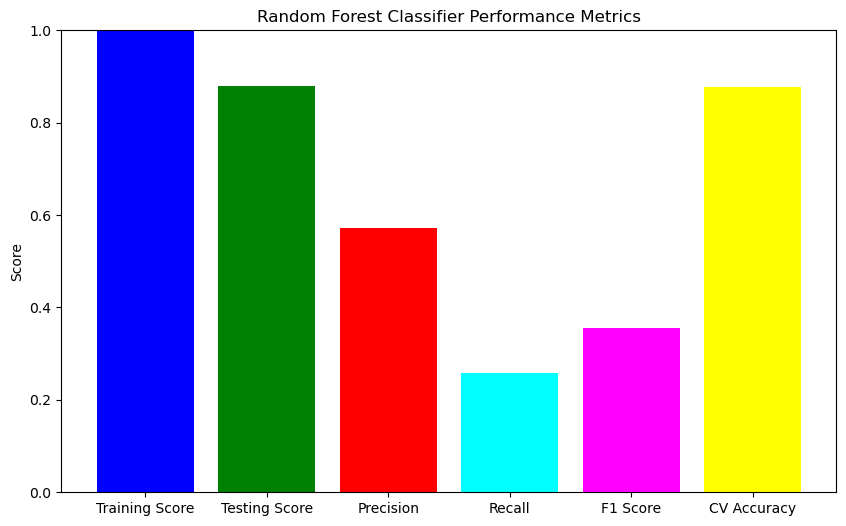

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score


# Cross-validation scores
cv_scores = cross_val_score(random_forest_model, X_train_ss_scaled, y_train, cv=5, scoring='accuracy')

# Training and Testing Scores
train_score = random_forest_model.score(X_train_ss_scaled, y_train)
test_score = random_forest_model.score(X_test_ss_scaled, y_test)

# Print the metrics
print(f"Random Forest - Training Data Score: {train_score}")
print(f"Random Forest - Testing Data Score: {test_score}")
print(f"Random Forest - Precision: {precision}")
print(f"Random Forest - Recall: {recall}")
print(f"Random Forest - F1 Score: {f1}")
print(f"Random Forest - Cross-Validation Accuracy: {cv_scores.mean()}")

# Plotting the scores
metrics = ['Training Score', 'Testing Score', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
values = [train_score, test_score, precision, recall, f1, cv_scores.mean()]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Random Forest Classifier Performance Metrics')
plt.show()

# GradientBoostingClassifier MODELING


In [12]:
# Create and train the model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_ss_scaled, y_train)
# Predict on test set
y_pred = gbm_model.predict(X_test_ss_scaled)
cv_scores = cross_val_score(gbm_model, X_train_ss_scaled, y_train, cv=5, scoring='accuracy')
# Score the model
print(f"Gradient Boosting Machine - Training Data Score: {gbm_model.score(X_train_ss_scaled, y_train)}")
print(f"Gradient Boosting Machine - Testing Data Score: {gbm_model.score(X_test_ss_scaled, y_test)}")
print(f"Gradient Boosting Machine - Precision: {precision_score(y_test, y_pred)}")
print(f"Gradient Boosting Machine - Recall: {recall_score(y_test, y_pred)}")
print(f"Gradient Boosting Machine - F1 Score: {f1_score(y_test, y_pred)}")
print(f"Gradient Boosting Machine - Cross-Validation Accuracy: {cv_scores.mean()}")


Gradient Boosting Machine - Training Data Score: 0.9413092550790068
Gradient Boosting Machine - Testing Data Score: 0.8918918918918919
Gradient Boosting Machine - Precision: 0.6666666666666666
Gradient Boosting Machine - Recall: 0.45161290322580644
Gradient Boosting Machine - F1 Score: 0.5384615384615384
Gradient Boosting Machine - Cross-Validation Accuracy: 0.8831845309142994


Gradient Boosting Machine - Training Data Score: 0.9413092550790068
Gradient Boosting Machine - Testing Data Score: 0.8918918918918919
Gradient Boosting Machine - Precision: 0.5714285714285714
Gradient Boosting Machine - Recall: 0.25806451612903225
Gradient Boosting Machine - F1 Score: 0.35555555555555557
Gradient Boosting Machine - Cross-Validation Accuracy: 0.8831845309142994


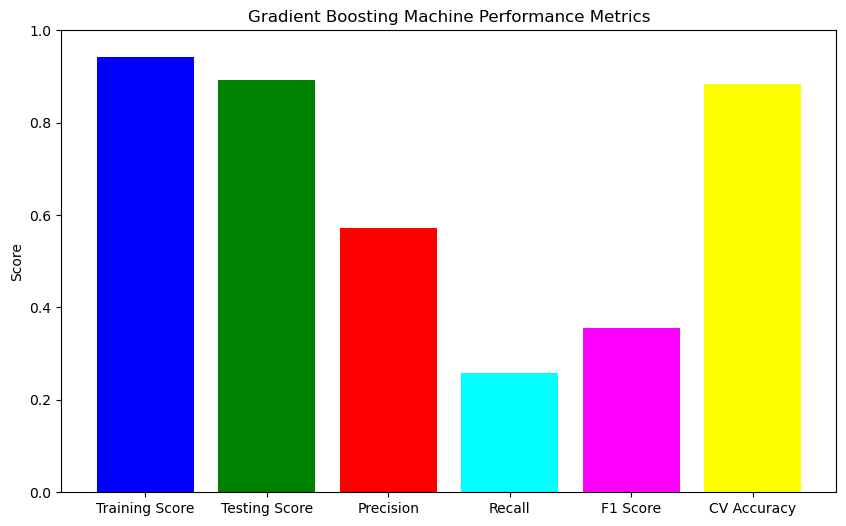

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


# Cross-validation scores
cv_scores = cross_val_score(gbm_model, X_train_ss_scaled, y_train, cv=5, scoring='accuracy')

# Training and Testing Scores
train_score = gbm_model.score(X_train_ss_scaled, y_train)
test_score = gbm_model.score(X_test_ss_scaled, y_test)

# Print the metrics
print(f"Gradient Boosting Machine - Training Data Score: {train_score}")
print(f"Gradient Boosting Machine - Testing Data Score: {test_score}")
print(f"Gradient Boosting Machine - Precision: {precision}")
print(f"Gradient Boosting Machine - Recall: {recall}")
print(f"Gradient Boosting Machine - F1 Score: {f1}")
print(f"Gradient Boosting Machine - Cross-Validation Accuracy: {cv_scores.mean()}")

# Plotting the scores
metrics = ['Training Score', 'Testing Score', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
values = [train_score, test_score, precision, recall, f1, cv_scores.mean()]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Gradient Boosting Machine Performance Metrics')
plt.show()


# KNeighborsClassifier

In [13]:


# Create and train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_ss_scaled, y_train)
# Predict on test set
y_pred = knn_model.predict(X_test_ss_scaled)
cv_scores = cross_val_score(knn_model, X_train_ss_scaled, y_train, cv=5, scoring='accuracy')
# Score the model
print(f"K-Nearest Neighbors - Training Data Score: {knn_model.score(X_train_ss_scaled, y_train)}")
print(f"K-Nearest Neighbors - Testing Data Score: {knn_model.score(X_test_ss_scaled, y_test)}")
print(f"K-Nearest Neighbors - Precision: {precision_score(y_test, y_pred)}")
print(f"K-Nearest Neighbors - Recall: {recall_score(y_test, y_pred)}")
print(f"K-Nearest Neighbors - F1 Score: {f1_score(y_test, y_pred)}")
print(f"K-Nearest Neighbors - Cross-Validation Accuracy: {cv_scores.mean()}")

K-Nearest Neighbors - Training Data Score: 0.8967268623024831
K-Nearest Neighbors - Testing Data Score: 0.8806306306306306
K-Nearest Neighbors - Precision: 0.6451612903225806
K-Nearest Neighbors - Recall: 0.3225806451612903
K-Nearest Neighbors - F1 Score: 0.4301075268817204
K-Nearest Neighbors - Cross-Validation Accuracy: 0.871902602052996


K-Nearest Neighbors - Training Data Score: 0.8967268623024831
K-Nearest Neighbors - Testing Data Score: 0.8806306306306306
K-Nearest Neighbors - Precision: 0.5714285714285714
K-Nearest Neighbors - Recall: 0.25806451612903225
K-Nearest Neighbors - F1 Score: 0.35555555555555557
K-Nearest Neighbors - Cross-Validation Accuracy: 0.871902602052996


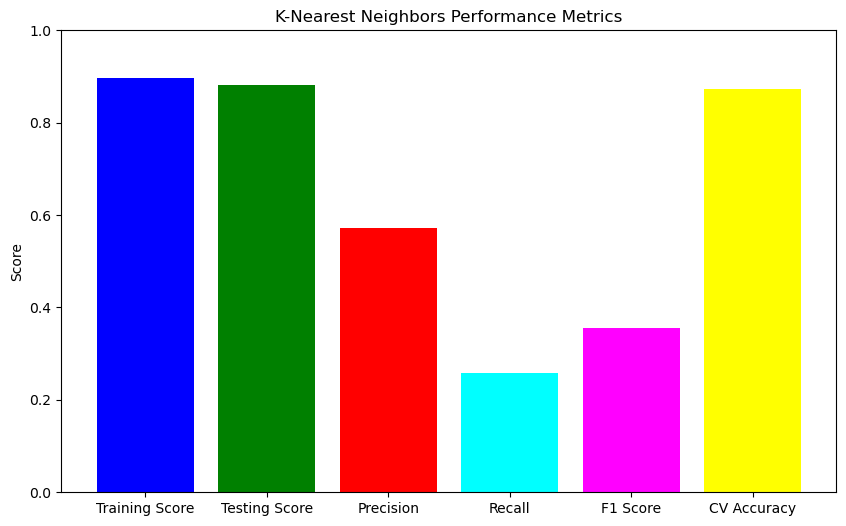

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_scores = cross_val_score(knn_model, X_train_ss_scaled, y_train, cv=5, scoring='accuracy')

# Training and Testing Scores
train_score = knn_model.score(X_train_ss_scaled, y_train)
test_score = knn_model.score(X_test_ss_scaled, y_test)

# Print the metrics
print(f"K-Nearest Neighbors - Training Data Score: {train_score}")
print(f"K-Nearest Neighbors - Testing Data Score: {test_score}")
print(f"K-Nearest Neighbors - Precision: {precision}")
print(f"K-Nearest Neighbors - Recall: {recall}")
print(f"K-Nearest Neighbors - F1 Score: {f1}")
print(f"K-Nearest Neighbors - Cross-Validation Accuracy: {cv_scores.mean()}")

# Plotting the scores
metrics = ['Training Score', 'Testing Score', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
values = [train_score, test_score, precision, recall, f1, cv_scores.mean()]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('K-Nearest Neighbors Performance Metrics')
plt.show()

# SVC (Support Vector Machine) Model

In [14]:

# Create and train the model
svm_model = SVC()
svm_model.fit(X_train_ss_scaled, y_train)
# Predict on test set
y_pred = svm_model.predict(X_test_ss_scaled)
# Cross-validation scores
cv_scores = cross_val_score(svm_model, X_train_ss_scaled, y_train, cv=5, scoring='accuracy')

# Score the model
print(f"Support Vector Machine - Training Data Score: {svm_model.score(X_train_ss_scaled, y_train)}")
print(f"Support Vector Machine - Testing Data Score: {svm_model.score(X_test_ss_scaled, y_test)}")
print(f"Support Vector Machine - Precision: {precision_score(y_test, y_pred)}")
print(f"Support Vector Machine - Recall: {recall_score(y_test, y_pred)}")
print(f"Support Vector Machine - F1 Score: {f1_score(y_test, y_pred)}")
print(f"Support Vector Machine - Cross-Validation Accuracy: {cv_scores.mean()}")


Support Vector Machine - Training Data Score: 0.9085778781038375
Support Vector Machine - Testing Data Score: 0.8693693693693694
Support Vector Machine - Precision: 0.5714285714285714
Support Vector Machine - Recall: 0.25806451612903225
Support Vector Machine - F1 Score: 0.35555555555555557
Support Vector Machine - Cross-Validation Accuracy: 0.8735927428980663


Support Vector Machine - Training Data Score: 0.9085778781038375
Support Vector Machine - Testing Data Score: 0.8693693693693694
Support Vector Machine - Precision: 0.5714285714285714
Support Vector Machine - Recall: 0.25806451612903225
Support Vector Machine - F1 Score: 0.35555555555555557
Support Vector Machine - Cross-Validation Accuracy: 0.8735927428980663


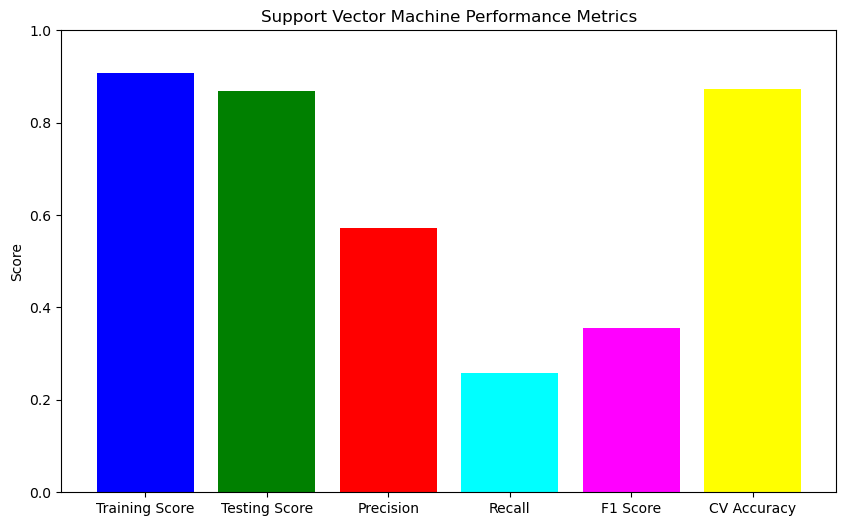

In [29]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score



# Cross-validation scores
cv_scores = cross_val_score(svm_model, X_train_ss_scaled, y_train, cv=5, scoring='accuracy')

# Training and Testing Scores
train_score = svm_model.score(X_train_ss_scaled, y_train)
test_score = svm_model.score(X_test_ss_scaled, y_test)

# Print the metrics
print(f"Support Vector Machine - Training Data Score: {train_score}")
print(f"Support Vector Machine - Testing Data Score: {test_score}")
print(f"Support Vector Machine - Precision: {precision}")
print(f"Support Vector Machine - Recall: {recall}")
print(f"Support Vector Machine - F1 Score: {f1}")
print(f"Support Vector Machine - Cross-Validation Accuracy: {cv_scores.mean()}")

# Plotting the scores
metrics = ['Training Score', 'Testing Score', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
values = [train_score, test_score, precision, recall, f1, cv_scores.mean()]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Support Vector Machine Performance Metrics')
plt.show()

# LogisticRegression Model

In [15]:
# Create and train the model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_ss_scaled, y_train)
# Predict on test set
y_pred = logistic_regression_model.predict(X_test_ss_scaled)
# Cross-validation scores
cv_scores = cross_val_score(logistic_regression_model, X_train_ss_scaled, y_train, cv=5, scoring='accuracy')

# Score the model
print(f"Logistic Regression - Training Data Score: {logistic_regression_model.score(X_train_ss_scaled, y_train)}")
print(f"Logistic Regression - Testing Data Score: {logistic_regression_model.score(X_test_ss_scaled, y_test)}")
print(f"Logistic Regression - Precision: {precision_score(y_test, y_pred)}")
print(f"Logistic Regression - Recall: {recall_score(y_test, y_pred)}")
print(f"Logistic Regression - F1 Score: {f1_score(y_test, y_pred)}")
print(f"Logistic Regression - Cross-Validation Accuracy: {cv_scores.mean()}")

Logistic Regression - Training Data Score: 0.8871331828442438
Logistic Regression - Testing Data Score: 0.8738738738738738
Logistic Regression - Precision: 0.575
Logistic Regression - Recall: 0.3709677419354839
Logistic Regression - F1 Score: 0.45098039215686275
Logistic Regression - Cross-Validation Accuracy: 0.8820561788811968


Logistic Regression - Training Data Score: 0.8871331828442438
Logistic Regression - Testing Data Score: 0.8738738738738738
Logistic Regression - Precision: 0.5714285714285714
Logistic Regression - Recall: 0.25806451612903225
Logistic Regression - F1 Score: 0.35555555555555557
Logistic Regression - Cross-Validation Accuracy: 0.8820561788811968


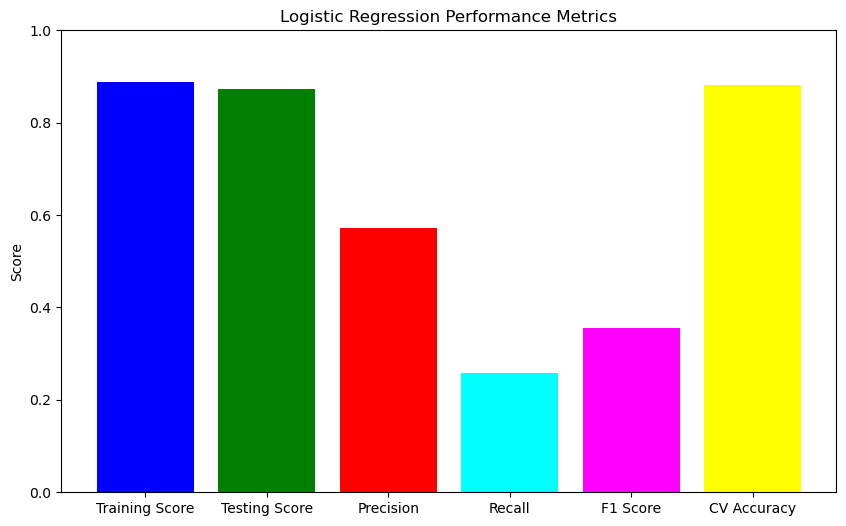

In [22]:
cv_scores = cross_val_score(logistic_regression_model, X_train_ss_scaled, y_train, cv=5, scoring='accuracy')

# Training and Testing Scores
train_score = logistic_regression_model.score(X_train_ss_scaled, y_train)
test_score = logistic_regression_model.score(X_test_ss_scaled, y_test)

# Print the metrics
print(f"Logistic Regression - Training Data Score: {train_score}")
print(f"Logistic Regression - Testing Data Score: {test_score}")
print(f"Logistic Regression - Precision: {precision}")
print(f"Logistic Regression - Recall: {recall}")
print(f"Logistic Regression - F1 Score: {f1}")
print(f"Logistic Regression - Cross-Validation Accuracy: {cv_scores.mean()}")

# Plotting the scores
metrics = ['Training Score', 'Testing Score', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
values = [train_score, test_score, precision, recall, f1, cv_scores.mean()]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Logistic Regression Performance Metrics')
plt.show()

# Decision Tree Model


In [16]:
# Create and train the model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_ss_scaled, y_train)
# Predict on test set
y_pred = decision_tree_model.predict(X_test_ss_scaled)
# Cross-validation scores
cv_scores = cross_val_score(decision_tree_model, X_train_ss_scaled, y_train, cv=5, scoring='accuracy')
# Score the model
print(f"Decision Tree - Training Data Score: {decision_tree_model.score(X_train_ss_scaled, y_train)}")
print(f"Decision Tree - Testing Data Score: {decision_tree_model.score(X_test_ss_scaled, y_test)}")
print(f"Decision Tree - Precision: {precision_score(y_test, y_pred)}")
print(f"Decision Tree - Recall: {recall_score(y_test, y_pred)}")
print(f"Decision Tree - F1 Score: {f1_score(y_test, y_pred)}")
print(f"Decision Tree - Cross-Validation Accuracy: {cv_scores.mean()}")

Decision Tree - Training Data Score: 1.0
Decision Tree - Testing Data Score: 0.8626126126126126
Decision Tree - Precision: 0.5074626865671642
Decision Tree - Recall: 0.5483870967741935
Decision Tree - F1 Score: 0.5271317829457364
Decision Tree - Cross-Validation Accuracy: 0.8374584228535052


Decision Tree - Training Data Score: 1.0
Decision Tree - Testing Data Score: 0.8626126126126126
Decision Tree - Precision: 0.5714285714285714
Decision Tree - Recall: 0.25806451612903225
Decision Tree - F1 Score: 0.35555555555555557
Decision Tree - Cross-Validation Accuracy: 0.8374584228535052


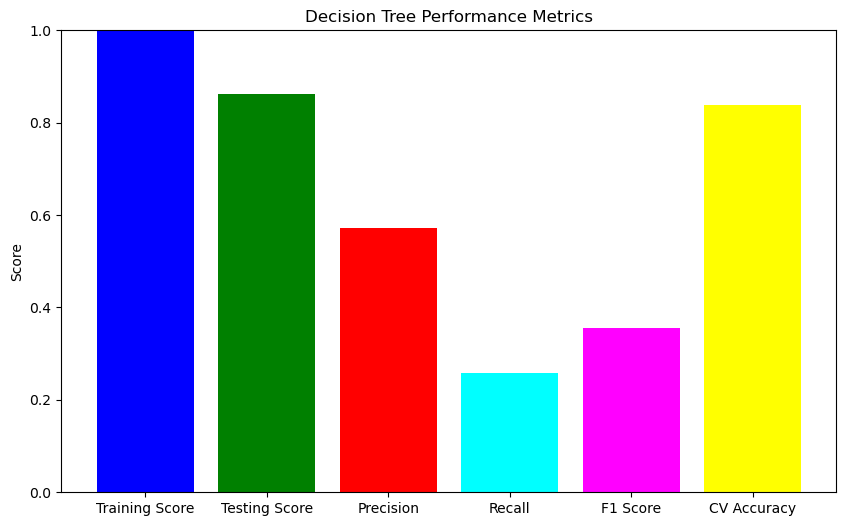

In [23]:
# Cross-validation scores
cv_scores = cross_val_score(decision_tree_model, X_train_ss_scaled, y_train, cv=5, scoring='accuracy')

# Training and Testing Scores
train_score = decision_tree_model.score(X_train_ss_scaled, y_train)
test_score = decision_tree_model.score(X_test_ss_scaled, y_test)

# Print the metrics
print(f"Decision Tree - Training Data Score: {train_score}")
print(f"Decision Tree - Testing Data Score: {test_score}")
print(f"Decision Tree - Precision: {precision}")
print(f"Decision Tree - Recall: {recall}")
print(f"Decision Tree - F1 Score: {f1}")
print(f"Decision Tree - Cross-Validation Accuracy: {cv_scores.mean()}")

# Plotting the scores
metrics = ['Training Score', 'Testing Score', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
values = [train_score, test_score, precision, recall, f1, cv_scores.mean()]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Decision Tree Performance Metrics')
plt.show()

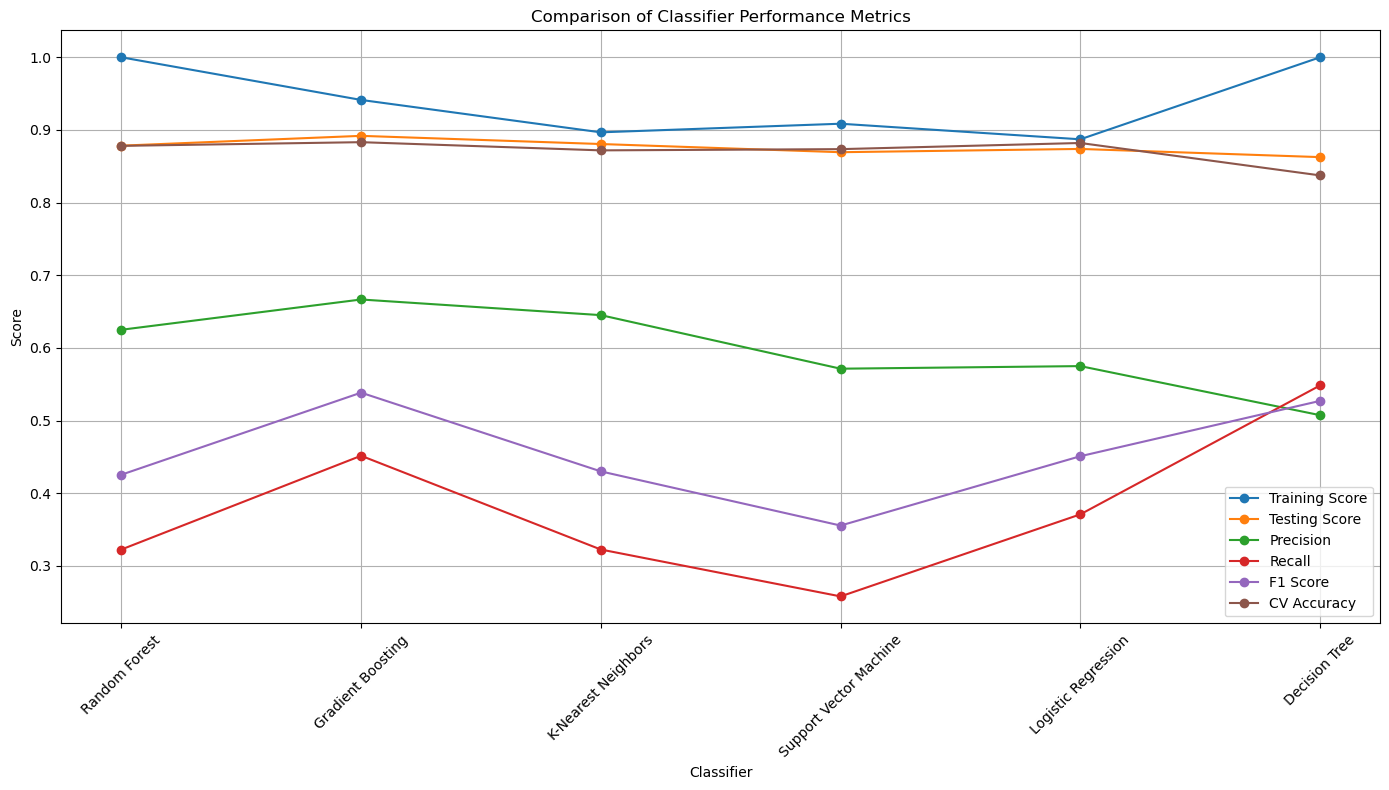

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Create and train the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {"Model": [], "Training Score": [], "Testing Score": [], "Precision": [], "Recall": [], "F1 Score": [], "CV Accuracy": []}

for name, model in models.items():
    model.fit(X_train_ss_scaled, y_train)
    y_pred = model.predict(X_test_ss_scaled)
    results["Model"].append(name)
    results["Training Score"].append(model.score(X_train_ss_scaled, y_train))
    results["Testing Score"].append(model.score(X_test_ss_scaled, y_test))
    results["Precision"].append(precision_score(y_test, y_pred))
    results["Recall"].append(recall_score(y_test, y_pred))
    results["F1 Score"].append(f1_score(y_test, y_pred))
    results["CV Accuracy"].append(cross_val_score(model, X_train_ss_scaled, y_train, cv=5, scoring='accuracy').mean())

# Plotting the scores
metrics = ['Training Score', 'Testing Score', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']

plt.figure(figsize=(14, 8))

for metric in metrics:
    plt.plot(results["Model"], results[metric], marker='o', label=metric)

plt.title('Comparison of Classifier Performance Metrics')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

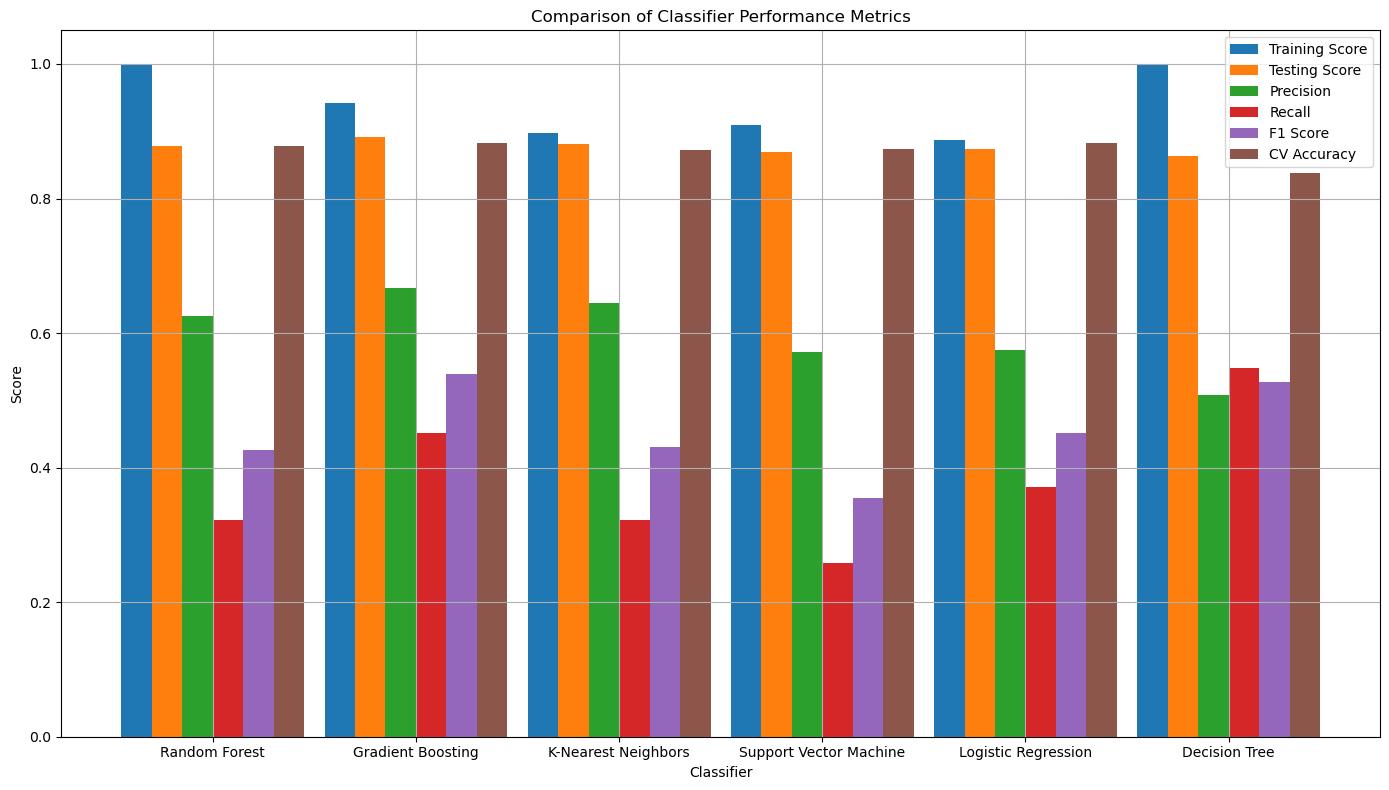

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Create and train the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {"Model": [], "Training Score": [], "Testing Score": [], "Precision": [], "Recall": [], "F1 Score": [], "CV Accuracy": []}

for name, model in models.items():
    model.fit(X_train_ss_scaled, y_train)
    y_pred = model.predict(X_test_ss_scaled)
    results["Model"].append(name)
    results["Training Score"].append(model.score(X_train_ss_scaled, y_train))
    results["Testing Score"].append(model.score(X_test_ss_scaled, y_test))
    results["Precision"].append(precision_score(y_test, y_pred))
    results["Recall"].append(recall_score(y_test, y_pred))
    results["F1 Score"].append(f1_score(y_test, y_pred))
    results["CV Accuracy"].append(cross_val_score(model, X_train_ss_scaled, y_train, cv=5, scoring='accuracy').mean())

# Plotting the scores
metrics = ['Training Score', 'Testing Score', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
num_models = len(results["Model"])
bar_width = 0.15
index = np.arange(num_models)

plt.figure(figsize=(14, 8))

for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, results[metric], bar_width, label=metric)

plt.title('Comparison of Classifier Performance Metrics')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(index + bar_width * 2.5, results["Model"])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()